## MOIP PROMETHEE flow 3-Dimensional Model

In this paragraph there is a presentation of the 3-Dimensional model involving the PROMETHEE flow. The 3 objective function will be the portfolio beta index, the portfolio dividend yield and the PROMETHEE flow. The input data for this method are the beta indexes, the PROMETHEE net flows and the dividend yield of each security:

In [1]:
from mip import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


numSecurities = 6
companyName = ['ACN', 'NOC', 'IBM', 'MSI', 'MSCI', 'ORA']
betaIndex = [0.8, 1.36, 0.59, 1.12, 1.05, 1.15]
Rev = [32.89, 77.86, 7.63, 1.48, 43.22, 39.53]
DYIndex = [1.44, 4.59, 1.33, 1.22, 1.74, 1.76]
promIndex = [0.3078, -0.0306, 0.0558, -0.0849, -0.1289, -0.1191]

Using Python-MIP package version 1.6.2


### Model Parameters

The model contains the following parameters:

* minSecurities : Minimum number of securities to participate in each portfolio. <br> 
* maxSecurities : Maximum number of securities to participate in each portfolio. <br>
* lowerBound : Minimum value of the weight of each security. <br>
* upperBound : Maximum value of the weight of each security. <br>

In [2]:
minSecurities = 6
maxSecurities = 10
lowerBound = 0.05
upperBound = 0.3

### Determination of the objectives target values

We solve the 1-objective optimisation problem for each one of the objective functions, in order to find their target values. Firstly, we solve the problem of minimising the portfolio beta.

In [3]:
m = Model()

onoff = [ m.add_var(var_type=BINARY) for i in range(numSecurities) ]
weights = [ m.add_var(var_type=CONTINUOUS) for i in range(numSecurities) ]

m += xsum(weights[i] for i in range(numSecurities)) == 1
m += xsum(onoff[i] for i in range(numSecurities)) <= maxSecurities
m += xsum(onoff[i] for i in range(numSecurities)) >= minSecurities
for i in range(numSecurities):
    m += weights[i] - lowerBound * onoff[i] >= 0
    m += weights[i] - upperBound * onoff[i] <= 0   

m.objective = minimize(xsum(weights[i] * betaIndex[i] for i in range(numSecurities))) 

status = m.optimize()

print(status, "\n")
minBeta = m.objective_value
print("Minimum Beta = ", minBeta, "\n")

OptimizationStatus.OPTIMAL 

Minimum Beta =  0.861 



Secondly, we solve the maximisation problem of the PROMETHEE flow function.

In [4]:
m = Model()

onoff = [ m.add_var(var_type=BINARY) for i in range(numSecurities) ]
weights = [ m.add_var(var_type=CONTINUOUS) for i in range(numSecurities) ]

m += xsum(weights[i] for i in range(numSecurities)) == 1
m += xsum(onoff[i] for i in range(numSecurities)) <= maxSecurities
m += xsum(onoff[i] for i in range(numSecurities)) >= minSecurities
for i in range(numSecurities):
    m += weights[i] - lowerBound * onoff[i] >= 0
    m += weights[i] - upperBound * onoff[i] <= 0   

m.objective = maximize(xsum(weights[i] * promIndex[i] for i in range(numSecurities))) 

status = m.optimize()

print(status, "\n")
maxProm = m.objective_value
print("Maximum PROMETHEE flow = ", maxProm, "\n")

OptimizationStatus.OPTIMAL 

Maximum PROMETHEE flow =  0.084785 



Finally, we solve the problem of maximising the portfolio dividend yield.

In [5]:
m = Model()

onoff = [ m.add_var(var_type=BINARY) for i in range(numSecurities) ]
weights = [ m.add_var(var_type=CONTINUOUS) for i in range(numSecurities) ]

m += xsum(weights[i] for i in range(numSecurities)) == 1
m += xsum(onoff[i] for i in range(numSecurities)) <= maxSecurities
m += xsum(onoff[i] for i in range(numSecurities)) >= minSecurities
for i in range(numSecurities):
    m += weights[i] - lowerBound * onoff[i] >= 0
    m += weights[i] - upperBound * onoff[i] <= 0   

m.objective = maximize(xsum(weights[i] * DYIndex[i] for i in range(numSecurities))) 

status = m.optimize()

print(status, "\n")
maxDY = m.objective_value
print("Maximum DY = ", maxDY, "\n")

OptimizationStatus.OPTIMAL 

Maximum DY =  2.5395 



### Minimax objective Optimisation Problem

In the following cell we set the final problem as a goal programming optimisation problem with the minimax objective. The results for a random selection of offsets is presented below:

OptimizationStatus.OPTIMAL 

Q =  0.03350039947771772 

ACN :  0.2805866288365215
NOC :  0.3
IBM :  0.16550896312890123
MSI :  0.049999999999999996
MSCI :  0.15390440803457714
ORA :  0.05

Portfolio beta =  1.005219219751575
Portfolio PROMETHEE flow =  0.056381686302817036
Portfolio DY =  2.417965336466194


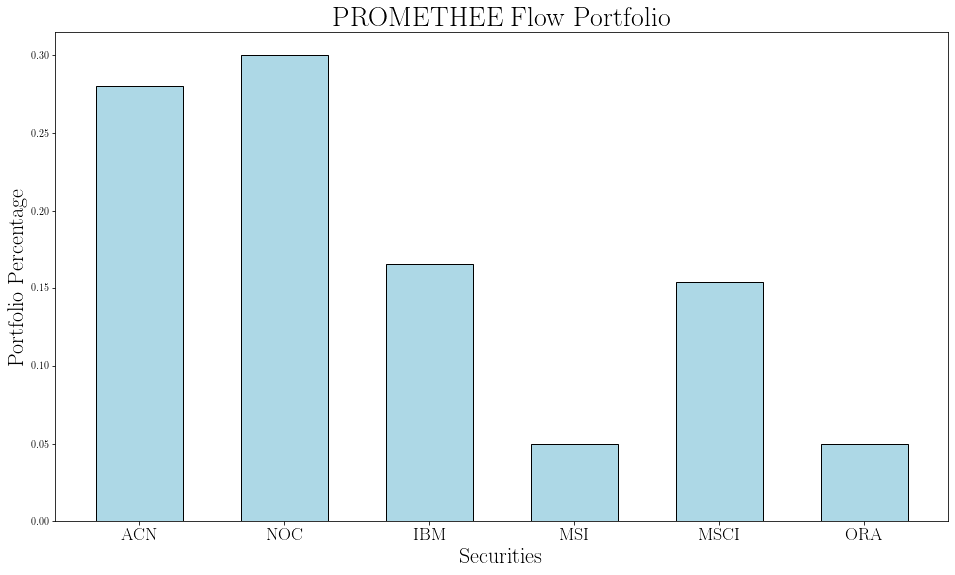

In [6]:
m = Model()

w1 = 0.2
w2 = 0.1
w3 = 0.7

onoff = [ m.add_var(var_type=BINARY) for i in range(numSecurities) ]
weights = [ m.add_var(var_type=CONTINUOUS) for i in range(numSecurities) ]
Q = m.add_var(var_type=CONTINUOUS)

m += xsum(weights[i] for i in range(numSecurities)) == 1
m += xsum(onoff[i] for i in range(numSecurities)) <= maxSecurities
m += xsum(onoff[i] for i in range(numSecurities)) >= minSecurities
for i in range(numSecurities):
    m += weights[i] - lowerBound * onoff[i] >= 0
    m += weights[i] - upperBound * onoff[i] <= 0   
    
m += w1 * ((xsum(weights[i] * betaIndex[i] for i in range(numSecurities))) - minBeta) / minBeta <= Q
m += w2 * (maxProm - (xsum(weights[i] * promIndex[i] for i in range(numSecurities)))) / maxProm <= Q
m += w3 * (maxDY - (xsum(weights[i] * DYIndex[i] for i in range(numSecurities)))) / maxDY <= Q


m.objective = minimize(Q) 

status = m.optimize()

print(status, "\n")
minQ = m.objective_value
print("Q = ", minQ, "\n")

for i in range(numSecurities):
    print(companyName[i],": ", weights[i].x * onoff[i].x)
print()

print("Portfolio beta = ", sum(weights[i].x * betaIndex[i] for i in range(numSecurities)))
print("Portfolio PROMETHEE flow = ", sum(weights[i].x * promIndex[i] for i in range(numSecurities)))
print("Portfolio DY = ", sum(weights[i].x * DYIndex[i] for i in range(numSecurities)))

plt.figure(figsize=(16,9))
for i in range(numSecurities):
    plt.bar(companyName[i], weights[i].x, color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r"Securities", fontsize=22)
plt.ylabel(r"Portfolio Percentage", fontsize=22)
plt.title(r"PROMETHEE Flow Portfolio", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot14.png", dpi=300)